<a href="https://colab.research.google.com/github/Hritik003/Optimization-of-OWC-using-ML-models/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/OWC'

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/OWC


In [3]:
df = pd.read_excel("Data_simple_OWC.xlsx")

In [4]:
df

,b/h,a/h,T_0,P_OWC
0,0.5,0.1,4.00,6166.015694
1,0.5,0.1,4.25,7425.068412
2,0.5,0.1,4.50,7204.635913
3,0.5,0.1,4.75,6980.917023
4,0.5,0.1,5.00,6212.720913
...,...,...,...,...
2875,4.0,0.8,14.00,7444.916425
2876,4.0,0.8,14.25,7845.898568
2877,4.0,0.8,14.50,8246.424103
2878,4.0,0.8,14.75,8645.654850


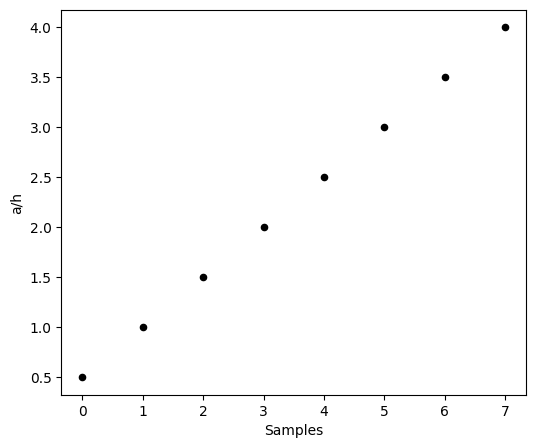

In [6]:
unique_vals = df.iloc[:,0].unique()
unique_vals = sorted(unique_vals)
plt.figure(figsize=(6, 5))
for i in range(len(unique_vals)):
    plt.scatter(i,unique_vals[i], color='black', s=20)
plt.xlabel('Samples')
plt.ylabel('a/h')
# plt.title('Plot of all the T_0 values used in the dataset')
plt.show()

In [7]:
stds = df.std()
stds[3]

5134.138616482193

In [8]:
means = df.mean()
means

b/h         2.250000
a/h         0.450000
T_0         9.500000
P_OWC    7533.760028
dtype: float64

In [9]:
scaler = StandardScaler()

In [10]:
df = scaler.fit_transform(df)
df = pd.DataFrame(df)

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# x_max = X.max()

# x_min=X.min()
# y_max = y.max()
# y_min = y.min()
# X = (X - x_min)/(x_max-x_min)
# y = (y - y_min)/(y_max-y_min)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

(2880, 3) (2880,)


In [12]:
X_train,y_train

(             0         1         2
 2133  0.654654  1.527525 -0.307996
 2008  0.654654  0.218218  0.461994
 278  -1.527525  1.091089 -1.077987
 1225 -0.218218 -0.218218 -0.923989
 2241  1.091089 -1.091089  1.077987
 ...        ...       ...       ...
 1638  0.218218  0.218218 -0.307996
 1095 -0.218218 -1.527525 -0.538993
 1130 -0.218218 -1.091089 -1.308984
 1294 -0.218218  0.218218  0.923989
 860  -0.654654 -0.218218 -1.308984
 
 [2016 rows x 3 columns],
 2133   -1.109055
 2008    0.781632
 278    -0.587233
 1225   -0.574917
 2241    1.302672
           ...   
 1638    0.000658
 1095    0.806364
 1130   -1.465385
 1294    1.379735
 860    -0.998811
 Name: 3, Length: 2016, dtype: float64)

# DNN

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [14]:
def create_regression_dnn(input_shape):
    model = models.Sequential()

    model.add(layers.InputLayer(input_shape=input_shape))

    model.add(layers.Dense(1024, activation=None, kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    # model.add(layers.Dropout(0.1))

    model.add(layers.Dense(512, activation=None, kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    # model.add(layers.Dropout(0.1))

    model.add(layers.Dense(256, activation=None, kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    # model.add(layers.Dropout(0.1))

    model.add(layers.Dense(128, activation=None, kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    # model.add(layers.Dropout(0.1))

    model.add(layers.Dense(64, activation=None, kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    # model.add(layers.Dropout(0.1))

    model.add(layers.Dense(1, activation='linear'))

    return model

input_shape = X_train.shape[1]
model = create_regression_dnn(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              4096      
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 512)               0

In [ ]:
initial_learning_rate = 0.005
decay_steps = 50
decay_rate = 0.9

def learning_rate_scheduler(epoch):
    return initial_learning_rate * decay_rate**(epoch / decay_steps)

optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)

history = model.fit(X_train, y_train, epochs=2000, batch_size=64, validation_split=0.2,callbacks=[lr_scheduler_callback])
# ,callbacks=[lr_scheduler_callback]

Epoch 1/2000
26/26 [==============================] - 4s 32ms/step - loss: 0.1314 - mae: 0.1314 - val_loss: 0.1029 - val_mae: 0.1029 - lr: 0.0050
Epoch 2/2000
19/26 [====================>.........] - ETA: 0s - loss: 0.1328 - mae: 0.1328

KeyboardInterrupt: 

In [15]:
model.load_weights('wt_2.h5')

In [16]:
y_pred = model.predict(X_test)
y_test = y_test.to_numpy()

# temp_df = pd.Dataframe

y_test = y_test*stds[3]+means[3]
y_pred = y_pred*stds[3]+means[3]

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Absolute Percentage Error (MAPE):", mape)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE):", rmse)

27/27 [==============================] - 1s 6ms/step
322.5129464308997
Mean Absolute Percentage Error (MAPE): 0.6883773725203313
Root Mean Squared Error (RMSE): 899.8854254999065


In [17]:
y_pred_2= model.predict(X_train)
y_train = y_train.to_numpy()
# Assuming y_pred and y_test are arrays or lists containing predicted and actual values respectively
# Calculate MAE

y_train = y_train*stds[3]+means[3]
y_pred_2 = y_pred_2*stds[3]+means[3]


mae = mean_absolute_error(y_train, y_pred_2)
print(mae)

mape = mean_absolute_percentage_error(y_train, y_pred_2)
print("Mean Absolute Percentage Error (MAPE):", mape) # 2.743%
rmse = np.sqrt(mean_squared_error(y_train, y_pred_2))

print("Root Mean Squared Error (RMSE):", rmse)


63/63 [==============================] - 0s 6ms/step
297.24096197502064
Mean Absolute Percentage Error (MAPE): 0.8582110398094085
Root Mean Squared Error (RMSE): 738.3610855919428


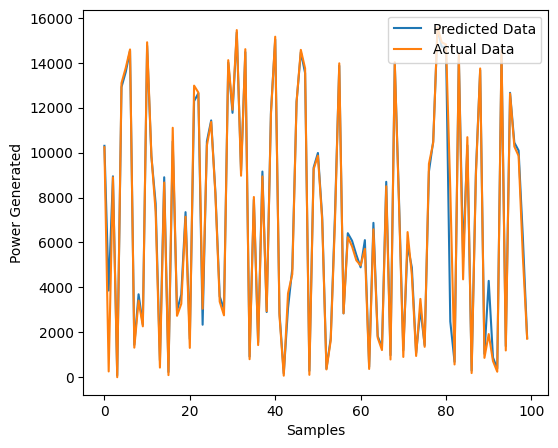

In [19]:
plt.figure(figsize=(6, 5))
plt.plot(y_pred[100:200],label='Predicted Data')
plt.plot(y_test[100:200], label = 'Actual Data')
plt.xlabel('Samples')
plt.ylabel('Power Generated')
# plt.title('Predicted Data vs Actual Data')
plt.legend(loc='upper right')
plt.show()

In [ ]:

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.9660715520723602


In [ ]:
# print(average_absolute_difference.numpy()*(y_max-y_min))

5811.386417820207


In [ ]:
train_rmse = np.sqrt(history.history['loss'])
val_rmse = np.sqrt(history.history['val_loss'])

train_mae = history.history['loss']
val_mae = history.history['val_loss']

In [ ]:
# model.save_weights('wt_2.h5')

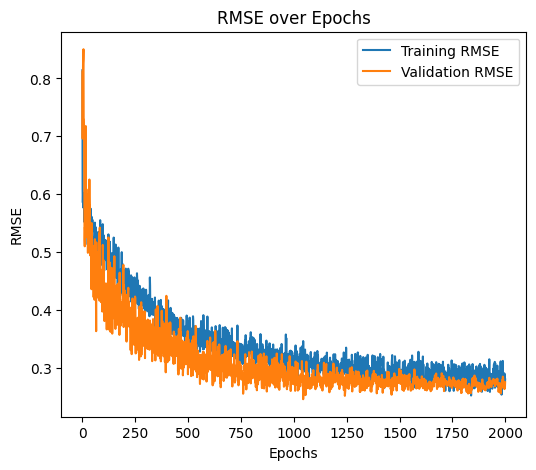

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot(train_rmse, label='Training RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.title('RMSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

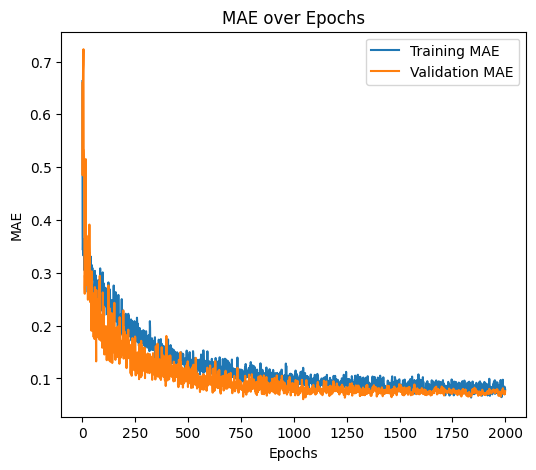

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot(train_mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

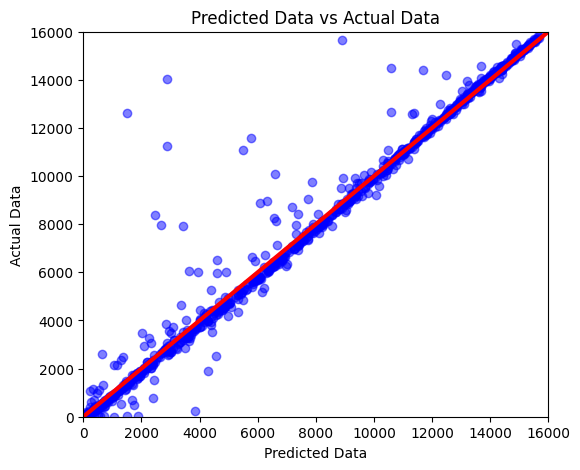

In [ ]:
temp = y_test.reshape(-1,1)
temp2 = y_train.reshape(-1,1)
# print(y_pred.shape,y_test)
plt.figure(figsize=(6,5))
plt.scatter(y_pred, temp, color='blue', alpha=0.5)

# Plotting the line y=x
plt.plot([0, 16000], [0, 16000], color='red',linewidth=3)

plt.title('Predicted Data vs Actual Data')
plt.xlabel('Predicted Data')
plt.ylabel('Actual Data')
plt.xlim(0, 16000)  # Setting x-axis limit
plt.ylim(0, 16000)  # Setting y-axis limit
plt.show()

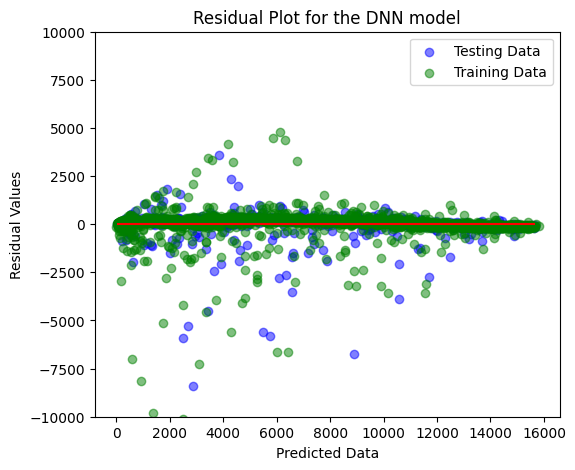

In [ ]:
temp = y_test.reshape(-1,1)
temp2 = y_train.reshape(-1,1)
# print(y_pred.shape,y_test)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, y_pred - temp, color='blue', alpha=0.5,label='Testing Data')

# Scatter plot for training data
plt.scatter(y_pred_2, y_pred_2 - temp2, color='green', alpha=0.5, label ='Training Data')

# Plotting the line y=0
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red')

plt.title('Residual Plot for the DNN model')
plt.xlabel('Predicted Data')
plt.ylabel('Residual Values')
# plt.xlim(0, 16000)
plt.ylim(-10000, 10000)
plt.legend(loc='upper right')
plt.show()

In [ ]:
train_mape = 0
test_mape = 0
for i in range(len(y_test)):
  test_mape += (abs(y_pred[i]-y_test[i])/y_test[i])
print(test_mape*100/len(y_test))

[3393.2087] 0.48339839858254374
[392.73248]


In [ ]:
print(len(y_test))

864


# Genetic Algo

In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.8 MB/s eta 0:00:00


In [ ]:
from deap import base, creator, tools, algorithms

In [ ]:
def evaluate(individual):
    model = create_regression_dnn(input_shape=(X_train.shape[1],))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.set_weights(individual)
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    loss = history.history['loss'][-1]
    return loss,

In [ ]:
import random

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -1, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=calculate_total_params())
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define genetic operators
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, stats=stats, halloffame=hof, verbose=True)

best_individual = hof[0]
best_model = create_regression_dnn(input_shape=(X_train.shape[1],))
best_model.compile(optimizer='adam', loss='mean_squared_error')
best_model.set_weights(best_individual)

ValueError: You called `set_weights(weights)` on layer "sequential_1" with a weight list of length 701441, but the layer was expecting 32 weights. Provided weights: [0.22179142489302395, 0.5869497193398803, 0.829278...